In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

E:\projects\python\models\research\object_detection\utils\visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Alexa\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Alexa\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Alexa\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Alexa\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().sta

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            od_graph_def = tf.GraphDef()
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
PATH_TO_GRAPH = r'models/frozen_inference_graph.pb'
PATH_TO_LABELS = r'data/label_map.pbtxt'
NUM_CLASSES = 13

In [4]:
graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'GreenLeft'}, 3: {'id': 3, 'name': 'GreenRight'}, 4: {'id': 4, 'name': 'GreenStraight'}, 5: {'id': 5, 'name': 'GreenStraightLeft'}, 6: {'id': 6, 'name': 'GreenStraightRight'}, 7: {'id': 7, 'name': 'Red'}, 8: {'id': 8, 'name': 'RedLeft'}, 9: {'id': 9, 'name': 'RedRight'}, 10: {'id': 10, 'name': 'RedStraight'}, 11: {'id': 11, 'name': 'RedStraightLeft'}, 12: {'id': 12, 'name': 'Yellow'}, 13: {'id': 13, 'name': 'off'}}


In [12]:
# PATH_TO_IMGS = r'data/dataset_test_rgb/rgb/test/jpeg/'
PATH_TO_IMGS = r'data/udacity_testarea_rgb/'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
IMAGE_SIZE = (12, 8)
random.shuffle(TEST_IMGS)

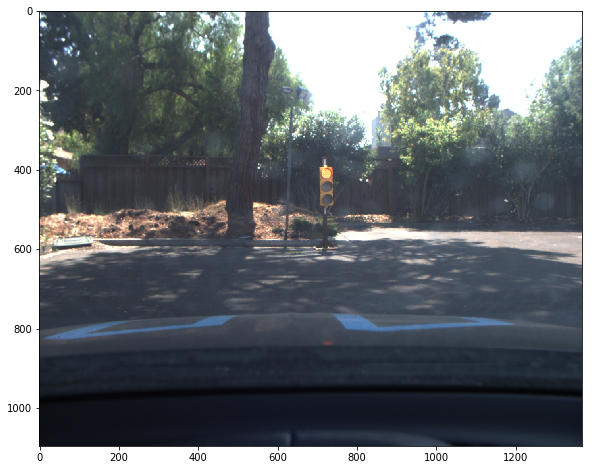

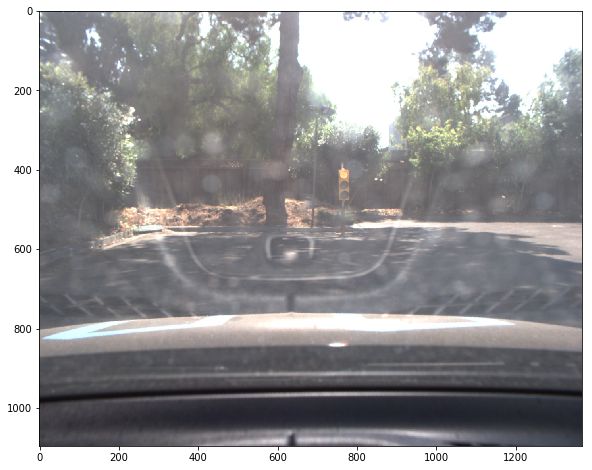

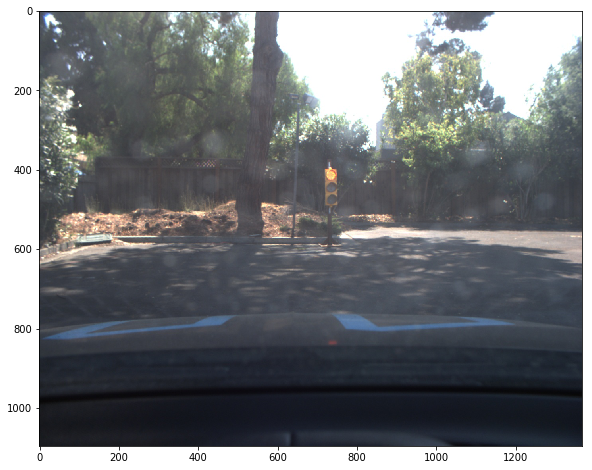

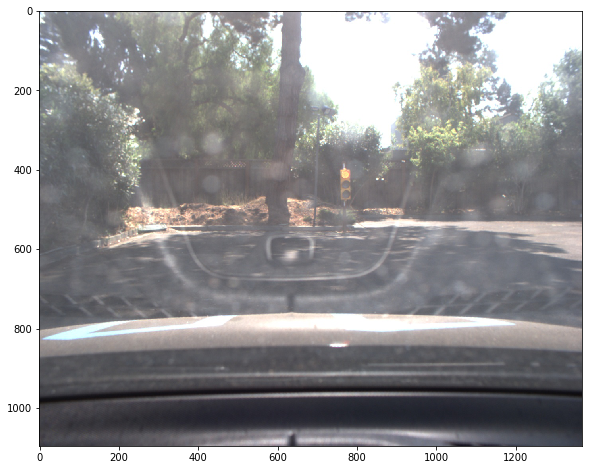

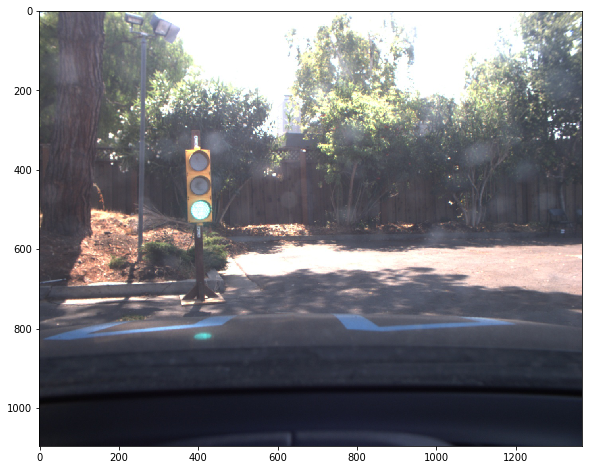

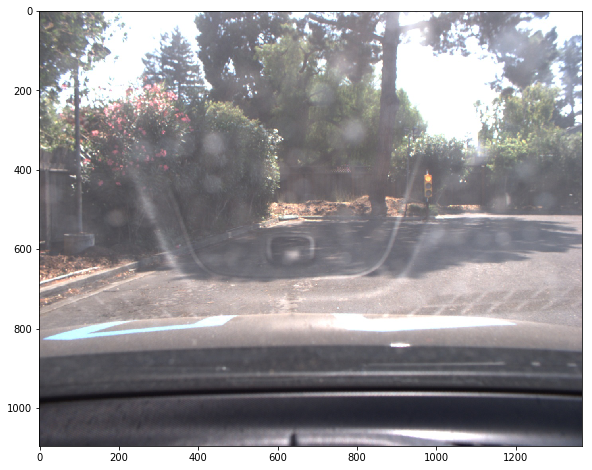

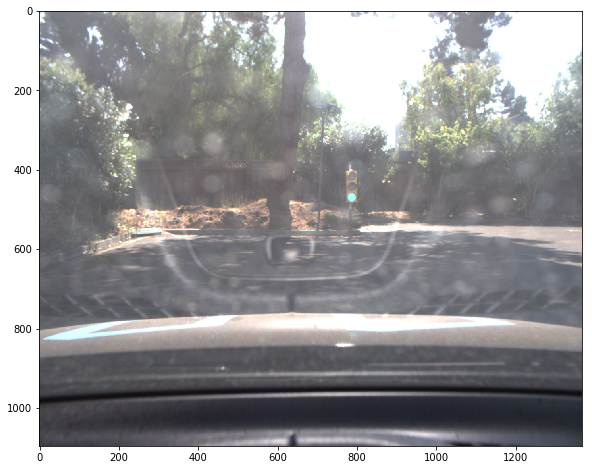

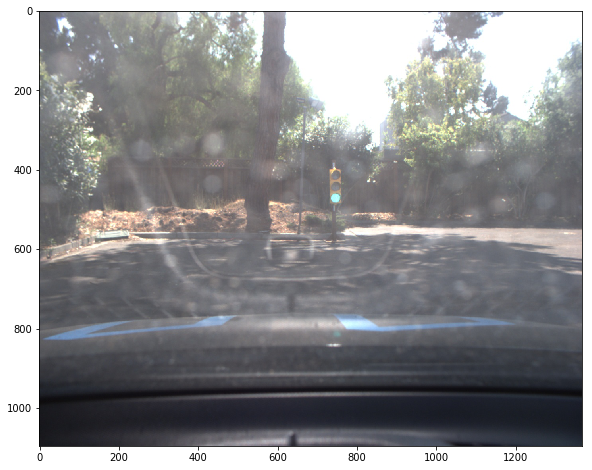

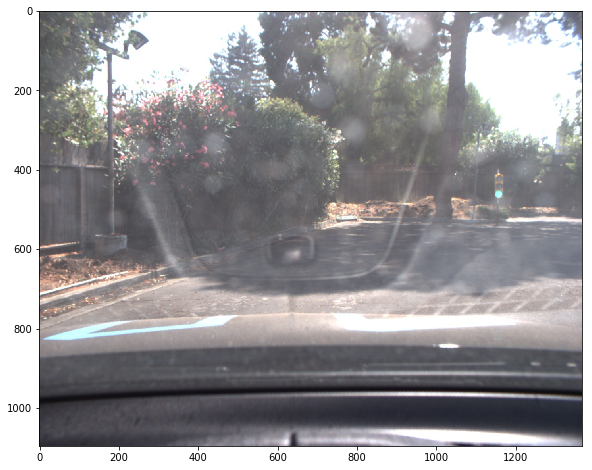

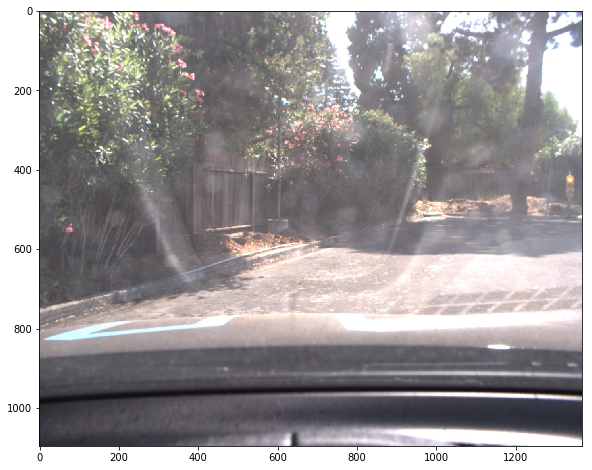

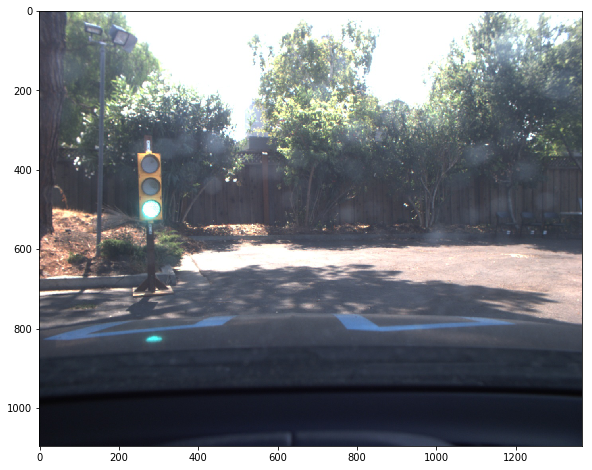

In [13]:
with graph.as_default():
    with tf.Session(graph=graph) as sess:
        image_tensor = graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = graph.get_tensor_by_name('detection_scores:0')
        detect_classes = graph.get_tensor_by_name('detection_classes:0')
        num_detections = graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break